# North America virtual geomagnetic poles

This notebook plots the compiled VGP data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import cartopy.crs as ccrs
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [8]:
current_path = os.getcwd() 
data_path = current_path + "/data/"
file_name = "compiled_vgps.csv"
vgps = pd.read_csv(data_path + file_name)
vgps.head()

,Unnamed: 0,pole_id,vgp_id,Name,slat,slon,n,dec,inc,k,...,vgp_lat_rev,vgp_lon_rev,vgp_lat_SH,vgp_lon_SH,2_sigma,comments (x = excluded),Unnamed: 23,dip_dir,dip,comments on age
0,0,19,1,SPU-1,37.96,-107.37,8.0,126.0,-58.0,101.0,...,48.258593,181.043183,-48.258593,1.043183,NaN,NaN,NaN,NaN,NaN,NaN
1,1,19,2,SPU-2,37.92,-107.35,9.0,97.0,-51.0,156.0,...,23.870715,185.202418,-23.870715,5.202418,NaN,NaN,NaN,NaN,NaN,NaN
2,2,19,3,SPU-3,37.92,-107.38,9.0,195.0,-74.0,43.0,...,65.810275,270.934390,-65.810275,90.934390,NaN,NaN,NaN,NaN,NaN,NaN
3,3,19,4,SPU-4,37.92,-107.42,7.0,207.0,-77.0,705.0,...,58.496595,273.938740,-58.496595,93.938740,NaN,NaN,NaN,NaN,NaN,NaN
4,4,19,5,SPU-5,37.93,-107.40,7.0,195.0,-73.0,297.0,...,67.202535,272.992840,-67.202535,92.992840,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
current_path = os.getcwd() 
data_path_PP = current_path + "/data/poles_NAM"
file_name = "/NAM_poles_0_130.xlsx"
poles = pd.read_excel(data_path_PP + file_name)
poles.head()

,ID,name,min_age,max_age,age,slat,slon,N,k,alpha95,...,lithology,Rlat,Rlon,Euler_lat,Euler_lon,Euler_ang,author,Q,reliability,age constraints
0,1,USGS SW North America composite,0.0,1.0,0.5,36.30,242.13,38,24.7,4.8,...,volcanic,-86.3,5.7,0.0,0.0,0.0,Mankinen (2008),5,NaN,Brunhes normal chron
1,2,Michoacan Guanajuato volcanic ﬁeld,0.0,0.6,0.3,19.25,257.67,8,29.0,9.1,...,volcanic,-86.4,9.2,79.2,23.0,0.2,Maciel Peña et al. (2009),5,NaN,Ar-Ar ages of 82 to 612 ka (from another study)
2,3,Tequila volcanic ﬁelds,0.1,1.1,0.6,20.46,256.76,17,26.0,7.1,...,volcanic,-85.3,-94.1,79.9,22.7,0.3,Ceja et al. (2006),5,NaN,Ar/Ar ages of 0.115 to 1.13 Ma (from another s...
3,4,Trans Mexican Volcanic Belt,0.0,2.0,1.0,19.40,260.10,24,47.3,4.3,...,volcanic,-88.9,-75.1,79.9,22.7,0.3,Ruiz-Martínez et al. (2010),5,NaN,all Quaternary rocks (some K-Ar dated)
4,5,Katherine Creek sediments,0.0,3.0,1.5,65.00,232.40,100,9.1,4.9,...,clastics,-80.0,4.2,80.8,22.8,0.4,Barendregt et al. (1996),3,NaN,magnetostratigraphy


In [78]:
def vgp_pole_means(study_id,
                   print_compilation_pole=True,
                   print_vgp_calc_pole=True,
                   plot_vgp_calc_pole=True,
                   plot_compilation_pole=True):
    
    compilation_pole = poles[poles.ID == study_id]
    site_vpgs = vgps[vgps.pole_id == study_id]
    pole_from_vgps = ipmag.fisher_mean(site_vpgs.vgp_lon.tolist(),site_vpgs.vgp_lat.tolist())
    
    if print_compilation_pole:
        
        print('Pole name: ' + str(compilation_pole['name'].tolist()[0]))
        print('')
        print('South pole within compilation')
        print('Plon: ' + str(compilation_pole['plon'].tolist()[0]) +
              '  Plat: ' + str(compilation_pole['plat'].tolist()[0]))
        print('Number of directions in mean (n): ' + str(compilation_pole['N'].tolist()[0]))
        print('Angular radius of 95% confidence (A_95): ' +
              str(compilation_pole['A95'].tolist()[0]))
        print('Precision parameter (k) estimate: ' +
              str(compilation_pole['K'].tolist()[0]))
        print('')
        print('North pole within compilation')
        print('Plon: ' + str((compilation_pole['plon'].tolist()[0]+180)%360) +
              '  Plat: ' + str(-compilation_pole['plat'].tolist()[0]))
        print('Number of directions in mean (n): ' + str(compilation_pole['N'].tolist()[0]))
        print('Angular radius of 95% confidence (A_95): ' +
              str(compilation_pole['A95'].tolist()[0]))
        print('Precision parameter (k) estimate: ' +
              str(compilation_pole['K'].tolist()[0]))
    
    if print_vgp_calc_pole:
        pole_from_vgps = ipmag.fisher_mean(site_vpgs.vgp_lon.tolist(),site_vpgs.vgp_lat.tolist())
        print('')
        print('pole calculated from VGPs')
        ipmag.print_pole_mean(pole_from_vgps)
 
    map_axis = ipmag.make_orthographic_map(0, 90, land_color='white', 
                                           land_edge_color='grey',
                                           figsize=(7,7))
    ipmag.plot_vgp(map_axis, site_vpgs['vgp_lon'], site_vpgs['vgp_lat'],markersize=30,
                   color='darkblue',label='vgps')
    
    if plot_vgp_calc_pole:
        ipmag.plot_pole(map_axis, plon=pole_from_vgps['dec'], 
                        plat=pole_from_vgps['inc'], 
                        A95=pole_from_vgps['alpha95'], 
                        color = 'darkred', marker='s', markersize=40,
                        label='vgp calc pole')
        
    if plot_compilation_pole:
        if np.isnan(compilation_pole['A95'].tolist()[0]):
            A95 = 0
        else:
            A95=compilation_pole['A95'].tolist()[0]
        ipmag.plot_pole(map_axis, plon=(compilation_pole['plon'].tolist()[0]+180)%360, 
                        plat=-compilation_pole['plat'].tolist()[0], 
                        A95=A95, 
                        color = 'orange', marker='d', markersize=40,label='compilation pole')
    plt.legend()
    plt.show()

Pole name: USGS SW North America composite

South pole within compilation
Plon: 5.7  Plat: -86.3
Number of directions in mean (n): 38
Angular radius of 95% confidence (A_95): nan
Precision parameter (k) estimate: nan

North pole within compilation
Plon: 185.7  Plat: 86.3
Number of directions in mean (n): 38
Angular radius of 95% confidence (A_95): nan
Precision parameter (k) estimate: nan

pole calculated from VGPs
Plon: 220.7  Plat: 86.0
Number of directions in mean (n): 45
Angular radius of 95% confidence (A_95): 5.1
Precision parameter (k) estimate: 18.4


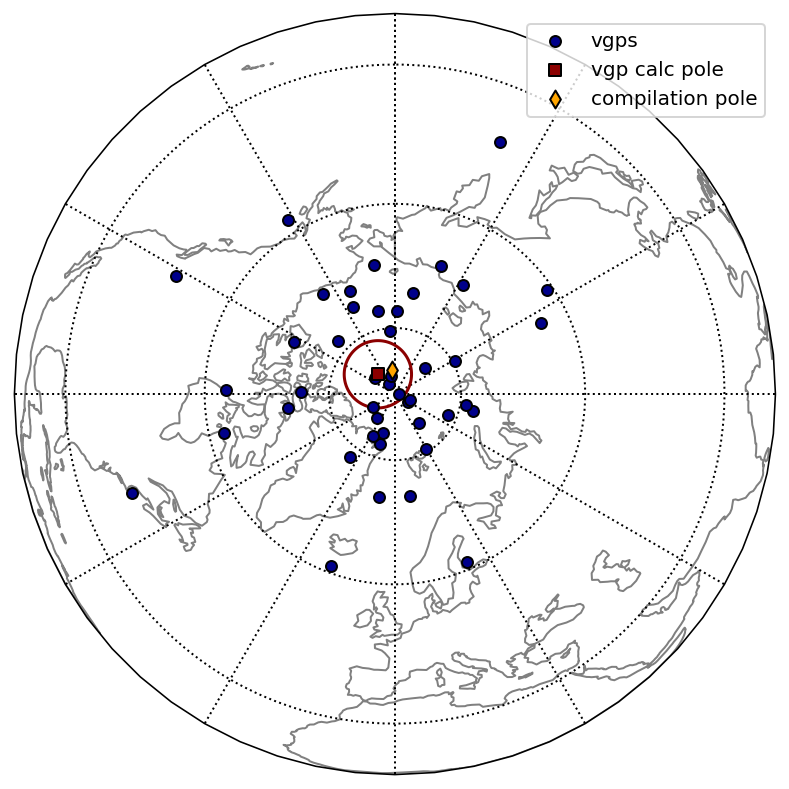

Pole name: Michoacan Guanajuato volcanic ﬁeld

South pole within compilation
Plon: 39.9  Plat: -84.4
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 8.5
Precision parameter (k) estimate: 33.0

North pole within compilation
Plon: 219.9  Plat: 84.4
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 8.5
Precision parameter (k) estimate: 33.0

pole calculated from VGPs
Plon: 222.7  Plat: 83.1
Number of directions in mean (n): 8
Angular radius of 95% confidence (A_95): 10.1
Precision parameter (k) estimate: 31.3


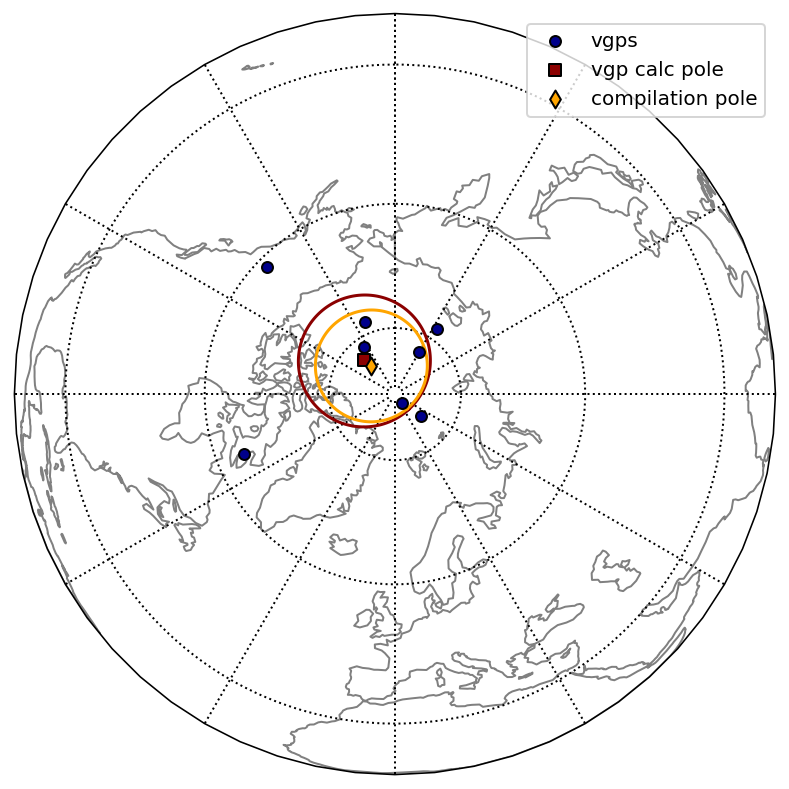

Pole name: Tequila volcanic ﬁelds

South pole within compilation
Plon: 264.3  Plat: -85.8
Number of directions in mean (n): 17
Angular radius of 95% confidence (A_95): 6.9
Precision parameter (k) estimate: 27.5

North pole within compilation
Plon: 84.30000000000001  Plat: 85.8
Number of directions in mean (n): 17
Angular radius of 95% confidence (A_95): 6.9
Precision parameter (k) estimate: 27.5

pole calculated from VGPs
Plon: 137.1  Plat: 78.8
Number of directions in mean (n): 17
Angular radius of 95% confidence (A_95): 27.2
Precision parameter (k) estimate: 2.7


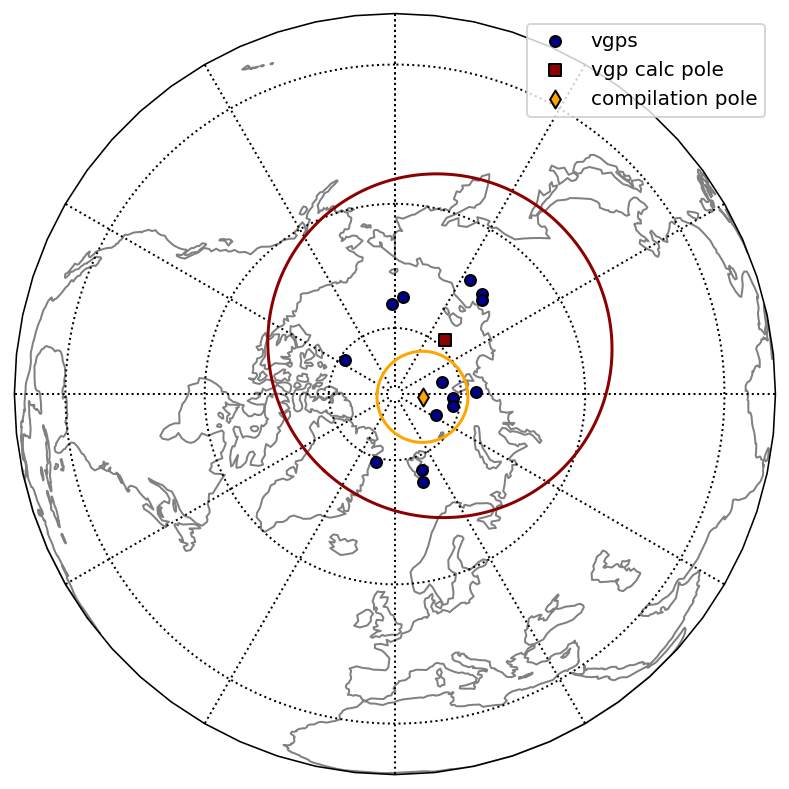

Pole name: Trans Mexican Volcanic Belt

South pole within compilation
Plon: 310.9  Plat: -89.2
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 3.5
Precision parameter (k) estimate: 70.7

North pole within compilation
Plon: 130.89999999999998  Plat: 89.2
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 3.5
Precision parameter (k) estimate: 70.7

pole calculated from VGPs
Plon: 146.4  Plat: 85.2
Number of directions in mean (n): 27
Angular radius of 95% confidence (A_95): 36.3
Precision parameter (k) estimate: 1.6


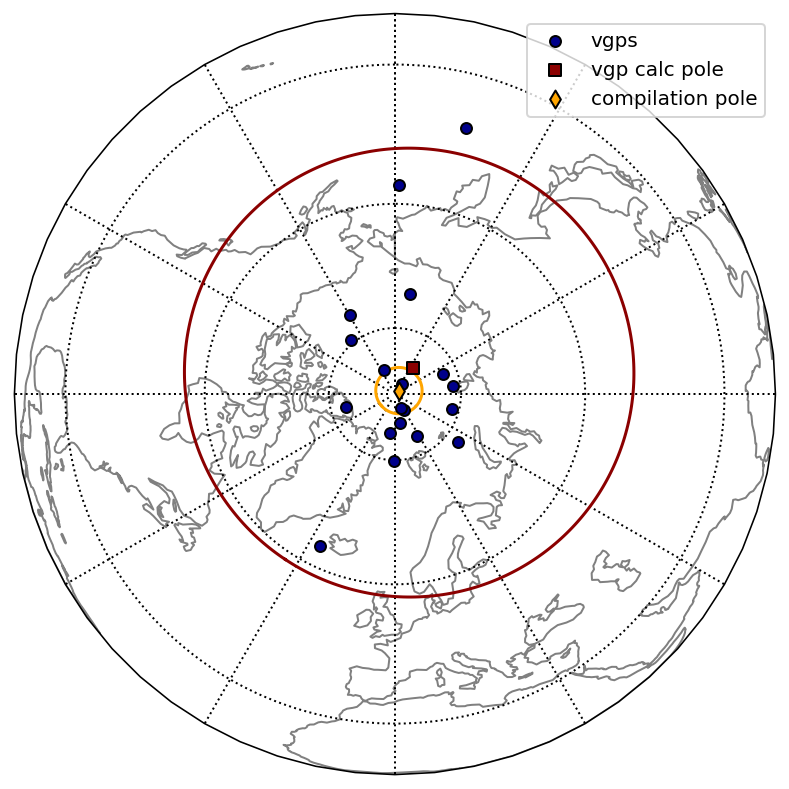

In [81]:
for n in range(1,5):
    vgp_pole_means(n)